In [1]:
## Vigilant Asset Allocation

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
# 시각화 관련 ##
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
##절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

from quant_functions import anal_funcs, data_funcs

In [5]:
## 조건1. 모멘텀 지표 => 5일변동, 20일변동, 60일변동, 120일변동 가중평균
## 조건2. 모멘텀 지표가 높은 자산을 전fid 매수
## 조건3. 모든 자산의 모멘텀 지표가 음수가 되었을 때 전량 매도 
## 조건4. 일단위 포지션 조정

## Func

In [6]:
df = data_funcs.get_merged_df('VOO', '^IXIC', '^GSPC')
df = df.fillna(method = 'pad')
df = df[['VOO', '^GSPC', '^IXIC']].dropna()
df.columns = ['Market', 'SNP', 'NAQ']

# df = df[['^GSPC', '^IXIC']].dropna()
# df.columns = ['SNP', 'NAQ']

[*********************100%%**********************]  3 of 3 completed


In [7]:
signal_df = (((df.pct_change(60)+1)**4 + (df.pct_change(120)+1)**2 + (df.pct_change(240)+1)**1)**(1/(240*3))).dropna()
signal_df['signal'] = np.where(signal_df['NAQ'] > signal_df['SNP'], 'NAQ', 'SNP')
signal_df['signal'][(signal_df['NAQ'] <= 1)&(signal_df['NAQ'] <= 1)] = 'CASH'
signal_df['signal'] = signal_df['signal'].shift()

In [8]:
rets = df.pct_change(1).dropna()
rets['CASH'] = 0
rets['signal'] = signal_df['signal']
rets = rets.dropna()

rets['Strategy'] = 0
rets['Strategy'][rets['signal'] == 'NAQ'] = rets['NAQ']
rets['Strategy'][rets['signal'] == 'SNP'] = rets['SNP']
rets = rets[['Market', 'SNP', 'NAQ', 'Strategy']] + 1
## rets = rets[['SNP', 'NAQ', 'Strategy']] + 1

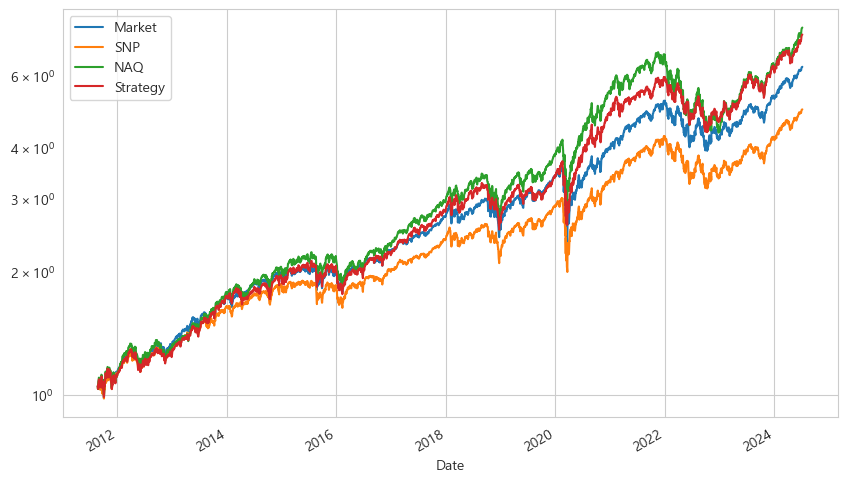

In [9]:
rets.cumprod().plot()
plt.yscale('log')

In [10]:
rets.tail(8).cumprod()

,Market,SNP,NAQ,Strategy
Date,,,,
2024-06-27,1.001551,1.000907,1.003006,1.003006
2024-06-28,0.997688,0.996820,0.995925,0.995925
2024-07-01,0.999983,0.999487,1.004164,1.004164
2024-07-02,1.006466,1.005679,1.012558,1.012558
2024-07-03,1.011014,1.010792,1.021519,1.021519
2024-07-05,1.017059,1.016300,1.030755,1.030755
2024-07-08,1.018036,1.017333,1.033618,1.033618
2024-07-09,1.019153,1.018087,1.035053,1.035053


In [23]:
(63.08/58.6 - 1)

0.07645051194539243

In [11]:
anal_funcs.get_Vol_report(rets.cumprod()).fillna(0)

,Return,Volatility,Volatility(Down),Residual,Beta,Sharpe_Ratio,Sortino_Ratio,Trainer_Ratio,Jensen_Alpha,Info_Ratio
Ticker,,,,,,,,,,
Market,8.22,4.21,3.02,0.00,1.00,1.48,2.06,6.22,0.00,0.00
SNP,7.47,4.22,3.11,0.11,1.00,1.30,1.76,5.48,-0.74,-6.87
NAQ,8.72,4.97,3.39,1.73,0.80,1.35,1.98,8.42,1.75,0.29
Strategy,8.61,4.62,3.06,1.36,0.87,1.43,2.16,7.59,1.19,0.28


In [12]:
anal_funcs.get_YTD_report(rets.cumprod()).tail()

,Market,SNP,NAQ,Strategy
Date,,,,
2020,16.83,15.06,36.21,36.21
2021,25.30,23.82,19.38,19.44
2022,-20.06,-21.62,-40.20,-23.27
2023,23.37,21.70,36.06,29.73
MEAN,12.03,10.16,12.25,13.21


In [16]:
signal_df.tail(8)

,Market,SNP,NAQ,signal
Date,,,,
2024-05-07,1.001863,1.001844,1.001854,NAQ
2024-05-08,1.001848,1.001830,1.001833,NAQ
2024-05-09,1.001885,1.001865,1.001863,NAQ
2024-05-10,1.001865,1.001846,1.001829,SNP
2024-05-13,1.001852,1.001834,1.001831,SNP
2024-05-14,1.001871,1.001854,1.001860,SNP
2024-05-15,1.001918,1.001900,1.001922,NAQ
2024-05-16,1.001899,1.001880,1.001910,NAQ
